In [234]:
import requests
import json
import datetime

clientIDFile = open("clientID.txt", "r")
for line in clientIDFile:
    clientID = line.strip()

clientSecretFile = open("clientSecret.txt", "r")
for line in clientSecretFile:
    clientSecret = line.strip()
    
def create_access_token(client_id, client_secret, region = 'us'):
    data = { 'grant_type': 'client_credentials' }
    response = requests.post('https://%s.battle.net/oauth/token' % region, data=data, auth=(client_id, client_secret))
    return response.json()

response = create_access_token(clientID, clientSecret)

auctionUrl = 'https://us.api.blizzard.com/data/wow/connected-realm/3684/auctions?namespace=dynamic-us&locale=en_US&access_token='

auctionResults = requests.get(auctionUrl + response['access_token'])

itemID = [172043,172053,172055,173034,173036,173037]

itemName = ['Feast of Gluttonous Hedonism','Tenebrous Ribs','Phantasmal Haunch','Silvergill Pike','Spinefin Piranha','Elysian Thade']

auctionCleaned = json.loads(auctionResults.text)

auctionList = auctionCleaned['auctions']

currentDatetime = datetime.datetime.now()

currentDate = currentDatetime.strftime("%x")
currentTime = currentDatetime.strftime("%X")
dayOfWeek = currentDatetime.strftime("%A")

auctionByRow = []

for row in auctionList:
    if row['item']['id'] in itemID:
        auctionByRow.append((row['id'], row['item']['id'], itemName[itemID.index(row['item']['id'])], row['time_left'],row['quantity'], row['unit_price'], currentDate, currentTime, dayOfWeek))
    else: ''

In [223]:
response

{'access_token': 'USzVwXQlUg7qpDT2PpIs3JtQiy8hOFRcmE',
 'expires_in': 86399,
 'token_type': 'bearer'}

In [228]:
auctionCleaned

{'_links': {'self': {'href': 'https://us.api.blizzard.com/data/wow/connected-realm/3684/auctions?namespace=dynamic-us'}},
 'auctions': [{'id': 2086319138,
   'item': {'id': 169701},
   'quantity': 200,
   'time_left': 'LONG',
   'unit_price': 89400},
  {'id': 2086325881,
   'item': {'id': 168583},
   'quantity': 200,
   'time_left': 'LONG',
   'unit_price': 598800},
  {'id': 2086358541,
   'item': {'id': 2453},
   'quantity': 400,
   'time_left': 'VERY_LONG',
   'unit_price': 2480000},
  {'id': 2085676959,
   'item': {'id': 151542},
   'quantity': 1,
   'time_left': 'MEDIUM',
   'unit_price': 23999900},
  {'id': 2086390764,
   'item': {'id': 173102},
   'quantity': 2,
   'time_left': 'LONG',
   'unit_price': 6805000},
  {'id': 2086303064,
   'item': {'id': 153476},
   'quantity': 2,
   'time_left': 'MEDIUM',
   'unit_price': 484600},
  {'id': 2085641726,
   'item': {'id': 160059},
   'quantity': 3,
   'time_left': 'MEDIUM',
   'unit_price': 6000},
  {'id': 2086330362,
   'item': {'id':

In [235]:
auctionByRow[0]

(2086218654,
 172055,
 'Phantasmal Haunch',
 'LONG',
 18,
 385000,
 '01/26/21',
 '14:31:53',
 'Tuesday')

In [231]:
# Checking to make sure data is within expected size

len(auctionByRow)

855

In [225]:
# Need to write by row and column because it is in list

with open("data.txt", "a") as data_file:
    for row in auctionByRow:
        for column in row:
            data_file.write(str(column) + ",")
        data_file.write("\n")

In [226]:
# Import data. Everything comes in as a string and there is an extra column
# Strings can be converted later and last column can be dropped if needed

imported_data = []

with open("data.txt", "r") as data_file:
    for row in data_file:
        tempRow = row.strip()
        tempRow = tempRow.split(",")
        imported_data.append(list(tempRow))

In [227]:
# Used when testing. Should be the same as len(auctionByRow)

len(imported_data)

1641

In [220]:
# Clean

imported_data[0:3]

[['2086363924',
  'Silvergill Pike',
  '2',
  '160900',
  '01/26/21',
  '13:02:54',
  'Tuesday',
  ''],
 ['2086218654',
  'Phantasmal Haunch',
  '18',
  '385000',
  '01/26/21',
  '13:02:54',
  'Tuesday',
  ''],
 ['2086095283',
  'Phantasmal Haunch',
  '3',
  '387700',
  '01/26/21',
  '13:02:54',
  'Tuesday',
  '']]

In [240]:
from platform import python_version
print(python_version())

3.6.4


Threw everything up to (and including) the write into a Python file:
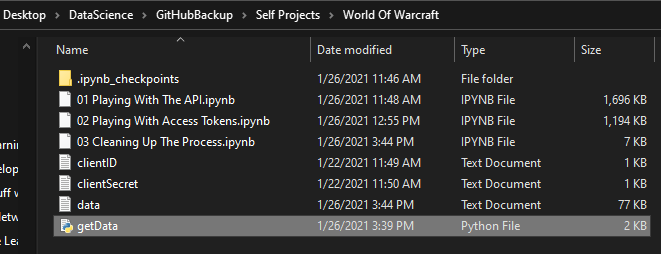

It worked perfectly:
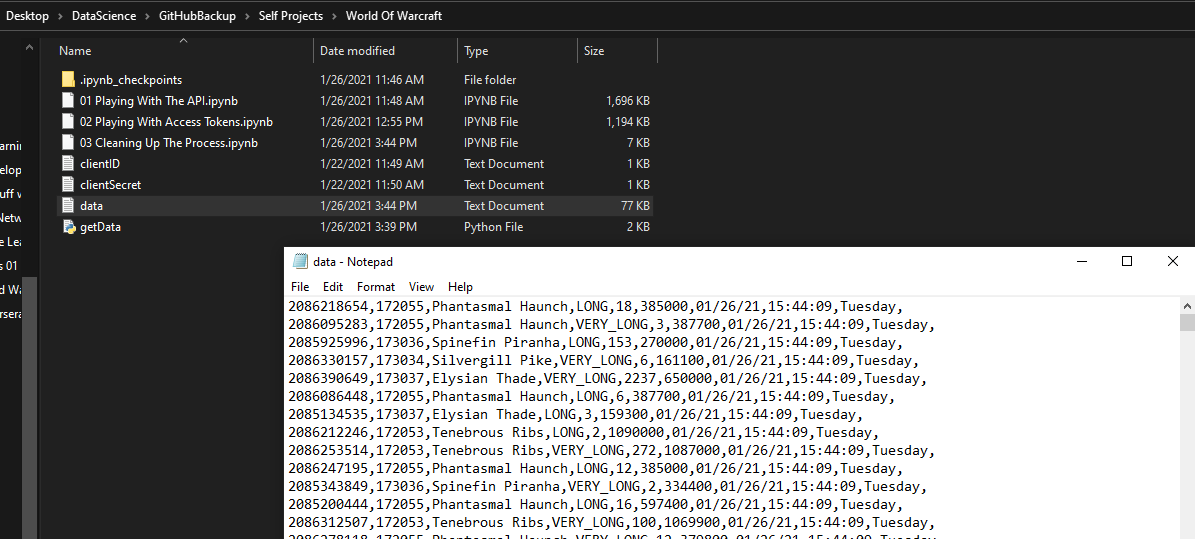


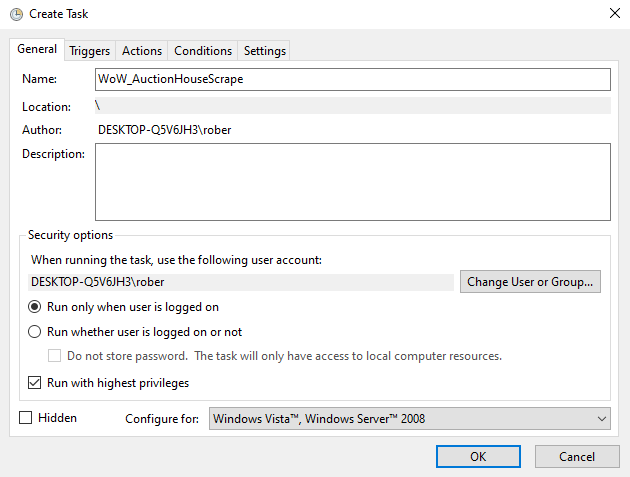

Automate the task to run by itself.

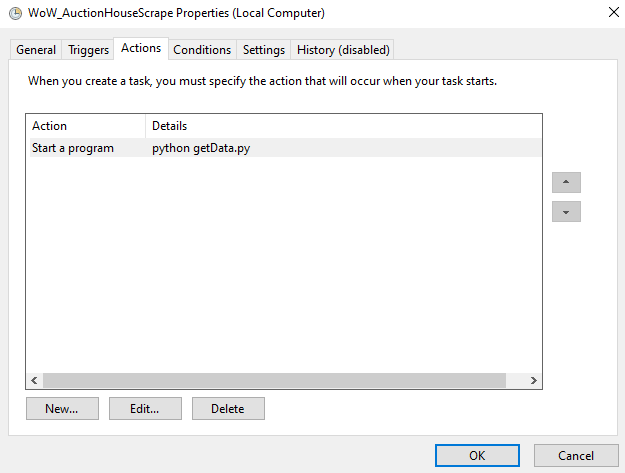

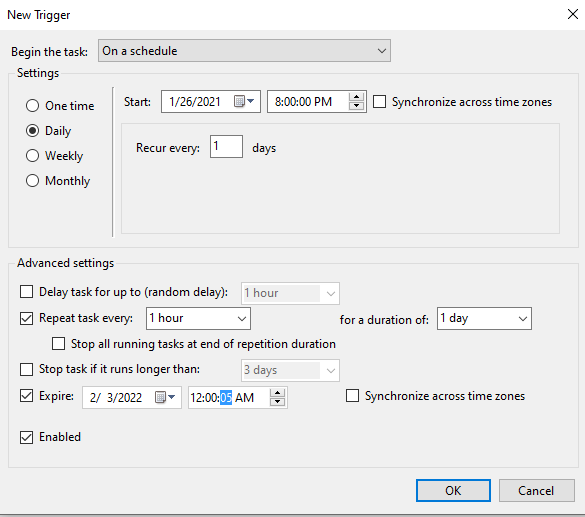

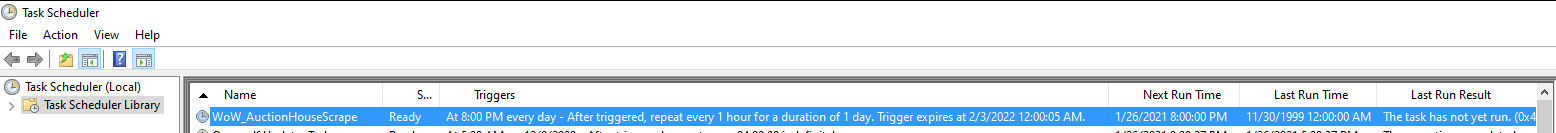

Also deleted the data file that was created through testing.